**Data Visulaization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/content/AIML Dataset (1).csv", on_bad_lines='skip')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313649 entries, 0 to 313648
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            313649 non-null  int64  
 1   type            313649 non-null  object 
 2   amount          313649 non-null  object 
 3   nameOrig        313648 non-null  object 
 4   oldbalanceOrg   313648 non-null  object 
 5   newbalanceOrig  313647 non-null  object 
 6   nameDest        313645 non-null  object 
 7   oldbalanceDest  313645 non-null  float64
 8   newbalanceDest  313641 non-null  object 
 9   isFraud         313639 non-null  float64
 10  isFlaggedFraud  313638 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 26.3+ MB


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,313338
1.0,301


In [ ]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,313638


In [ ]:
df.isnull().sum().sum()

np.int64(41)

In [ ]:
df.shape[0]

313649

In [ ]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.1)

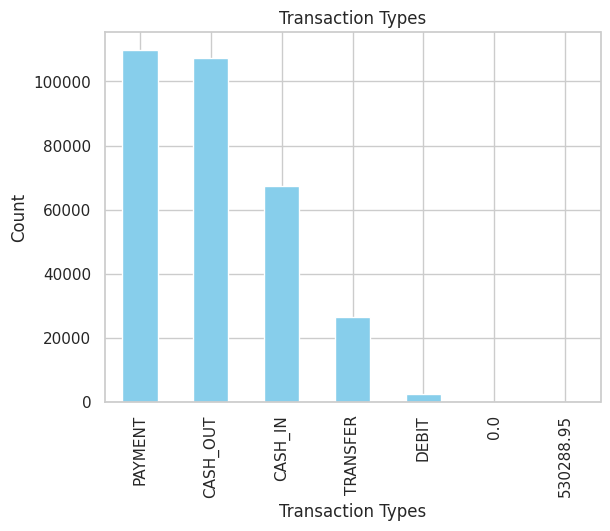

In [ ]:
df["type"].value_counts().plot(kind= "bar", title="Transaction Types", color = "skyblue")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

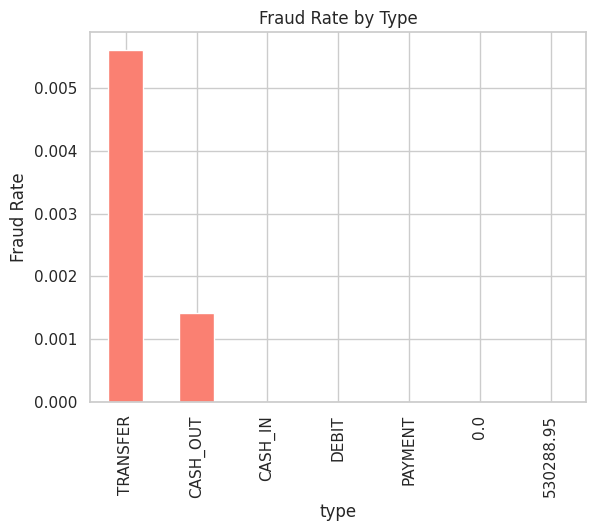

In [ ]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)

fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()


In [ ]:
df ["amount"].describe().astype(int)

,amount
count,313649
unique,311214
top,2475
freq,3


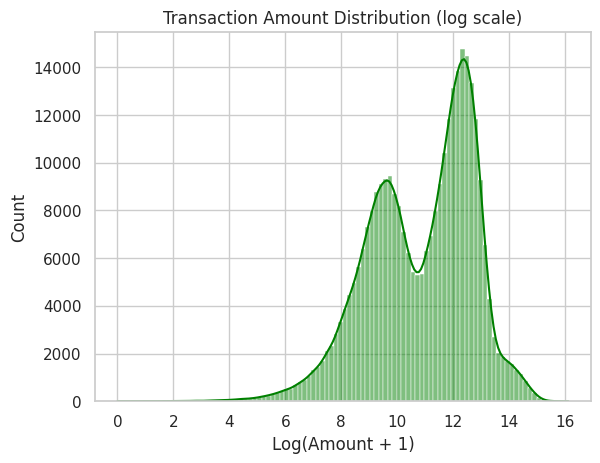

In [ ]:
sns.histplot(np.log1p(pd.to_numeric(df["amount"], errors="coerce").fillna(0)),
             bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()


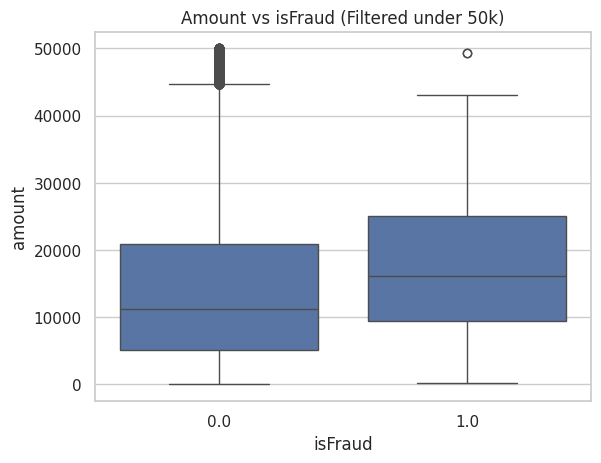

In [ ]:
# Convert to numeric (non-numeric values → NaN)
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")

# Now filter and plot
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()


In [ ]:
# Ensure numeric conversion for balance columns
cols = ["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Now safely compute balance differences
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [ ]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(67404)

In [ ]:
(df["balanceDiffDest"] < 0).sum()

np.int64(136492)

In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


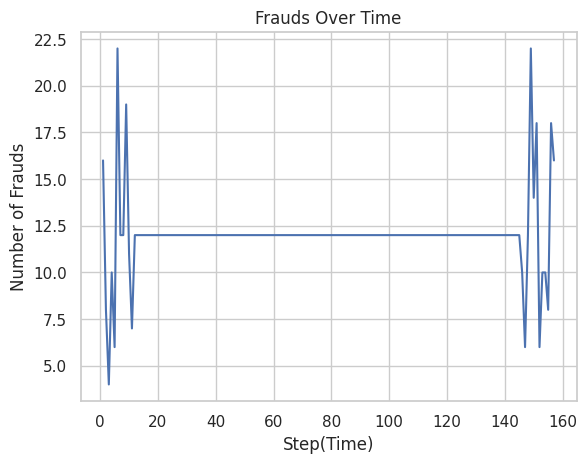

In [ ]:
frauds_per_step = df[df["isFraud"] == 1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns="step",inplace=True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [ ]:
top_senders = df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C1874796473,2
C899639357,2
C129546793,2
C1077855977,2
C1709295811,2
C1580651152,2
C44568807,2
C260230637,2
C1292071977,2


In [ ]:
top_receivers = df["nameDest"].value_counts().head(10)

In [ ]:
top_receivers

,count
nameDest,
C985934102,81
C1286084959,80
C248609774,76
C2083562754,75
C1590550415,74
C665576141,71
C977993101,70
C1360767589,67
C451111351,66


In [ ]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_users

,count
nameOrig,
C265790428,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1


In [ ]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [ ]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,107200
TRANSFER,26548


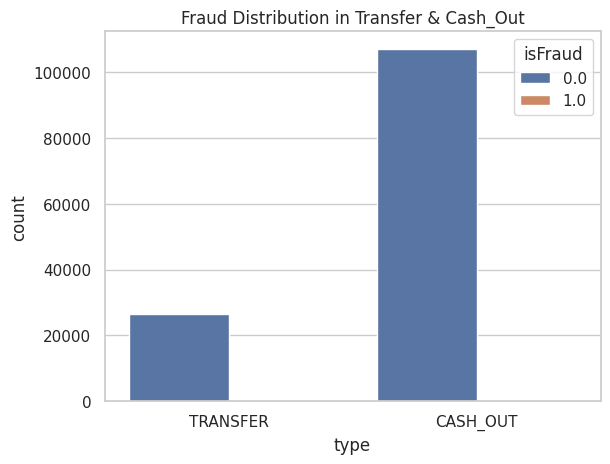

In [ ]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [ ]:
cols = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]

# Convert only existing columns to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Create balance difference columns
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

# Compute correlation
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest",
           "newbalanceDest","isFraud"]].corr()

In [ ]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.019888,-0.023923,0.214361,0.333942,0.065082
oldbalanceOrg,-0.019888,1.000000,0.998948,0.093129,0.062662,-0.000032
newbalanceOrig,-0.023923,0.998948,1.000000,0.094972,0.061941,-0.009458
oldbalanceDest,0.214361,0.093129,0.094972,1.000000,0.963566,-0.007454
newbalanceDest,0.333942,0.062662,0.061941,0.963566,1.000000,-0.003265
isFraud,0.065082,-0.000032,-0.009458,-0.007454,-0.003265,1.000000


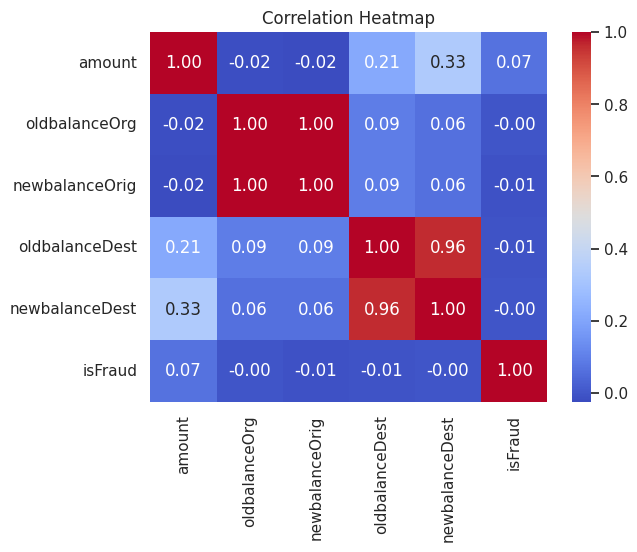

In [ ]:
sns.heatmap(corr,annot=True,cmap = "coolwarm", fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

55871

In [ ]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,-2712905.89


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,313338
1.0,301


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [ ]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [ ]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [ ]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [ ]:
y = df_model["isFraud"]
x = df_model.drop("isFraud",axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder = "drop"
)

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [ ]:
X_train_clean = X_train_clean.dropna()
y_train_clean = y_train_clean.loc[X_train_clean.index]

In [ ]:
X_test_clean = X_test.dropna()
pipeline.fit(X_train_clean, y_train_clean)
y_pred = pipeline.predict(X_test_clean)

In [ ]:
# Drop NaNs in y_test to avoid errors
y_test_clean = y_test.dropna()
y_pred_clean = y_pred[:len(y_test_clean)]


In [ ]:
# Generate classification report
classification_report(y_test_clean, y_pred_clean)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.90      0.95     93999\n         1.0       0.01      0.96      0.02        92\n\n    accuracy                           0.90     94091\n   macro avg       0.50      0.93      0.48     94091\nweighted avg       1.00      0.90      0.95     94091\n'

In [ ]:
# Drop NaNs in y_test
y_test_clean = y_test.dropna()
y_pred_clean = y_pred[:len(y_test_clean)]

# Compute confusion matrix
confusion_matrix(y_test_clean, y_pred_clean)

array([[84838,  9161],
       [    4,    88]])

In [ ]:
# Drop NaNs in y_test and align X_test
valid_idx = y_test.dropna().index
X_test_clean = X_test.loc[valid_idx]
y_test_clean = y_test.loc[valid_idx]

# Now scoring works
pipeline.score(X_test_clean, y_test_clean) * 100


90.25942970103411